# Candlestick Breakaway

https://patternswizard.com/breakaway-candlestick-pattern/

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import talib

import warnings
warnings.filterwarnings("ignore")

# yahoo finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'MPHASIS.NS'
start = '2020-01-01'
end = '2021-10-11'

# Read data 
df = yf.download(symbol,start,end)

# View Columns
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-01,927.000000,929.000000,913.549988,923.799988,879.139771,131875
2020-01-02,923.799988,926.500000,890.500000,894.049988,850.828003,360884
2020-01-03,894.000000,900.799988,878.450012,883.700012,840.978394,235166
2020-01-06,883.000000,883.000000,868.049988,875.200012,832.889343,99636
2020-01-07,878.000000,898.599976,877.049988,885.799988,842.976807,781520


## Candlestick with Breakaway

In [3]:
from matplotlib import dates as mdates
import datetime as dt

dfc = df.copy()
dfc['VolumePositive'] = dfc['Open'] < dfc['Adj Close']
#dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = pd.to_datetime(dfc['Date'])
dfc['Date'] = dfc['Date'].apply(mdates.date2num)
dfc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,VolumePositive
0,737425.0,927.000000,929.000000,913.549988,923.799988,879.139771,131875,False
1,737426.0,923.799988,926.500000,890.500000,894.049988,850.828003,360884,False
2,737427.0,894.000000,900.799988,878.450012,883.700012,840.978394,235166,False
3,737430.0,883.000000,883.000000,868.049988,875.200012,832.889343,99636,False
4,737431.0,878.000000,898.599976,877.049988,885.799988,842.976807,781520,False


Text(0, 0.5, 'Price')

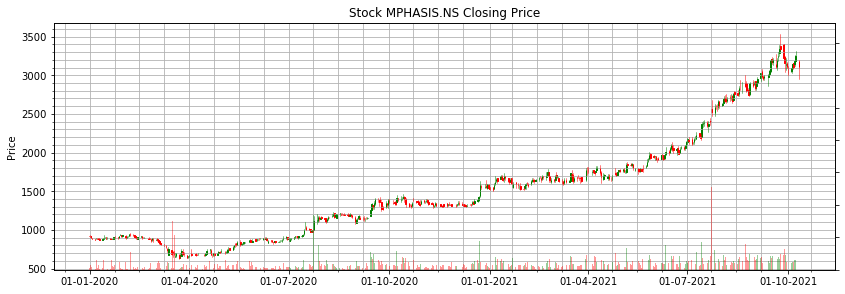

In [4]:
from mplfinance.original_flavor import candlestick_ohlc

fig = plt.figure(figsize=(14,10))
ax = plt.subplot(2, 1, 1)
candlestick_ohlc(ax,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax.grid(True, which='both')
ax.minorticks_on()
axv = ax.twinx()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
axv.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
axv.axes.yaxis.set_ticklabels([])
axv.set_ylim(0, 3*df.Volume.max())
ax.set_title('Stock '+ symbol +' Closing Price')
ax.set_ylabel('Price')

In [5]:
breakaway = talib.CDLBREAKAWAY(df['Open'], df['High'], df['Low'], df['Close'])

breakaway = breakaway[breakaway != 0]

In [6]:
df['breakaway'] = talib.CDLBREAKAWAY(df['Open'], df['High'], df['Low'], df['Close'])

In [7]:
df.loc[df['breakaway'] !=0]

,Open,High,Low,Close,Adj Close,Volume,breakaway
Date,,,,,,,
2020-05-04,718.0,723.5,692.549988,700.799988,666.920471,743300,-100


In [20]:
df['Adj Close'].loc[df['breakaway'] !=0]

Date
2020-05-04    666.920471
Name: Adj Close, dtype: float64

In [9]:
df['Adj Close'].loc[df['breakaway'] !=0].index

DatetimeIndex(['2020-05-04'], dtype='datetime64[ns]', name='Date', freq=None)

In [10]:
breakaway

Date
2020-05-04   -100
dtype: int32

In [11]:
breakaway.index

DatetimeIndex(['2020-05-04'], dtype='datetime64[ns]', name='Date', freq=None)

In [12]:
df

,Open,High,Low,Close,Adj Close,Volume,breakaway
Date,,,,,,,
2020-01-01,927.000000,929.000000,913.549988,923.799988,879.139771,131875,0
2020-01-02,923.799988,926.500000,890.500000,894.049988,850.828003,360884,0
2020-01-03,894.000000,900.799988,878.450012,883.700012,840.978394,235166,0
2020-01-06,883.000000,883.000000,868.049988,875.200012,832.889343,99636,0
2020-01-07,878.000000,898.599976,877.049988,885.799988,842.976807,781520,0
...,...,...,...,...,...,...,...
2021-10-05,3093.899902,3152.000000,3034.800049,3141.300049,3141.300049,610635,0
2021-10-06,3163.300049,3165.000000,3081.000000,3111.600098,3111.600098,598884,0
2021-10-07,3141.649902,3259.000000,3125.000000,3186.199951,3186.199951,740158,0


Text(0, 0.5, 'Price')

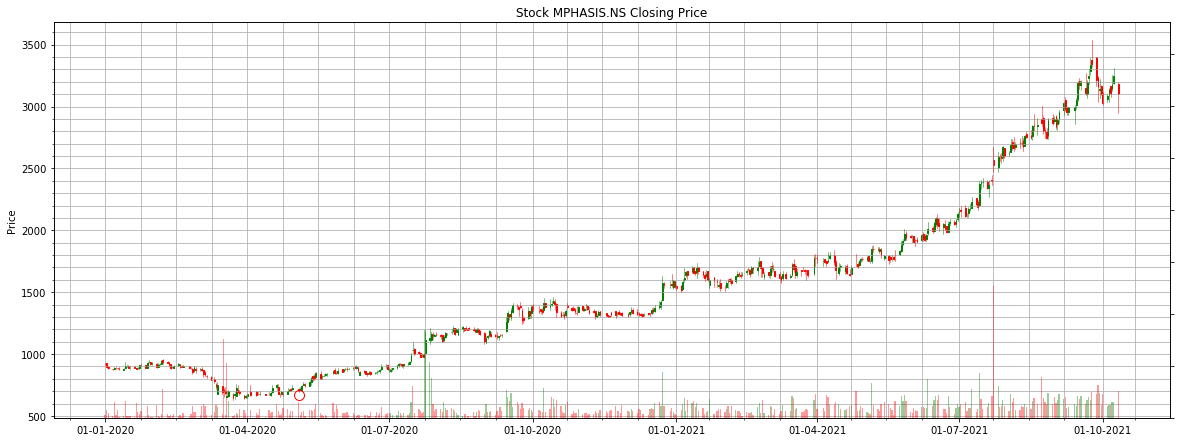

In [13]:
fig = plt.figure(figsize=(20,16))
ax = plt.subplot(2, 1, 1)
candlestick_ohlc(ax,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax.grid(True, which='both')
ax.minorticks_on()
axv = ax.twinx()
ax.plot_date(df['Adj Close'].loc[df['breakaway'] !=0].index, df['Adj Close'].loc[df['breakaway'] !=0],
                'or', # marker style 'o', color 'g'
                fillstyle='none', # circle is not filled (with color)
                ms=10.0) 
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
axv.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
axv.axes.yaxis.set_ticklabels([])
axv.set_ylim(0, 3*df.Volume.max())
ax.set_title('Stock '+ symbol +' Closing Price')
ax.set_ylabel('Price')

## Plot Certain dates

In [14]:
df = df['2020-05-01':'2020-06-01']
dfc = df.copy()
dfc['VolumePositive'] = dfc['Open'] < dfc['Adj Close']
#dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = pd.to_datetime(dfc['Date'])
dfc['Date'] = dfc['Date'].apply(mdates.date2num)
dfc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,breakaway,VolumePositive
0,737549.0,718.000000,723.500000,692.549988,700.799988,666.920471,743300,-100,False
1,737550.0,710.000000,733.299988,706.700012,714.549988,680.005737,122534,0,False
2,737551.0,710.200012,747.950012,700.799988,742.000000,706.128723,272043,0,False
3,737552.0,748.000000,773.950012,747.650024,755.049988,718.547852,340244,0,False
4,737553.0,761.099976,763.150024,735.000000,739.900024,704.130249,91859,0,False


Text(0, 0.5, 'Price')

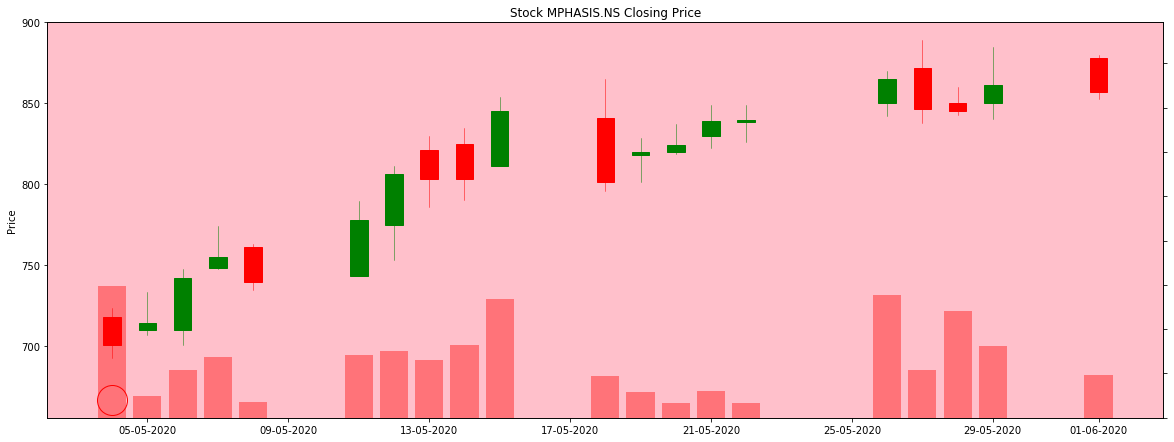

In [23]:
fig = plt.figure(figsize=(20,16))
ax = plt.subplot(2, 1, 1)
ax.set_facecolor('pink')
candlestick_ohlc(ax,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
#ax.grid(True, which='both')
#ax.minorticks_on()
axv = ax.twinx()
ax.plot_date(df['Adj Close'].loc[df['breakaway'] !=0].index, df['Adj Close'].loc[df['breakaway'] !=0],
                'or', # marker style 'o', color 'g'
                fillstyle='none', # circle is not filled (with color)
                ms=30.0) 
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
axv.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
axv.axes.yaxis.set_ticklabels([])
axv.set_ylim(0, 3*df.Volume.max())
ax.set_title('Stock '+ symbol +' Closing Price')
ax.set_ylabel('Price')

# Highlight Candlestick

Text(0, 0.5, 'Price')

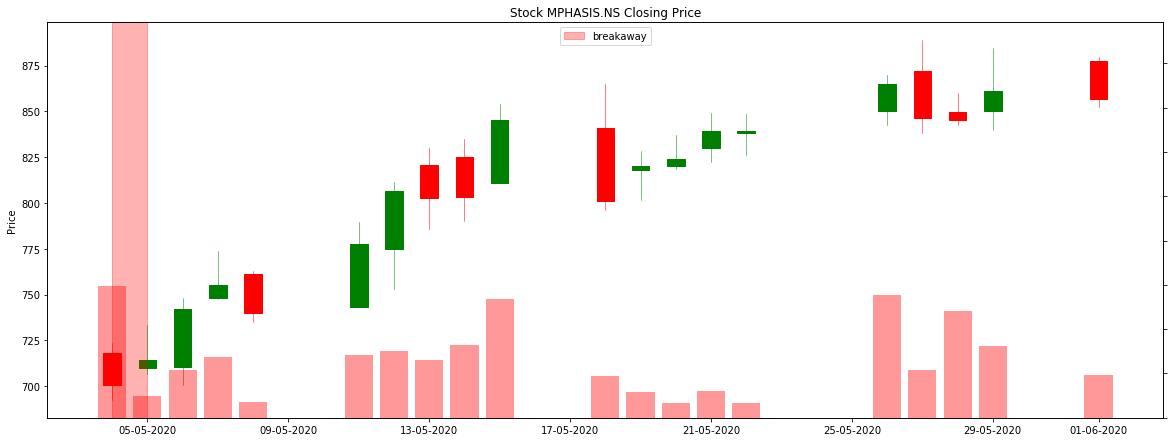

In [16]:
from matplotlib.dates import date2num
from datetime import datetime

fig = plt.figure(figsize=(20,16))
ax = plt.subplot(2, 1, 1)
candlestick_ohlc(ax,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
#ax.grid(True, which='both')
#ax.minorticks_on()
axv = ax.twinx()
ax.axvspan(date2num(datetime(2020,5,4)), date2num(datetime(2020,5,5)), 
           label="breakaway",color="red", alpha=0.3)
ax.legend(loc='upper center')
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
axv.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
axv.axes.yaxis.set_ticklabels([])
axv.set_ylim(0, 3*df.Volume.max())
ax.set_title('Stock '+ symbol +' Closing Price')
ax.set_ylabel('Price')